# Question 2
## For Sikka

# Importing Libraries

In [15]:
# setup environment
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Changing directory 
To load the data from local drive

In [3]:
# changing directory
import os
os.chdir(r'C:\Users\Shreemann\Downloads')

In [4]:
# to display all the rows and columns clearly
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
# load and look at data
users_offer = pd.read_csv('Q2_User offer data.csv').iloc[:,1:]
users_signup = pd.read_csv('Q2_users signup.csv')
offer_completion = pd.read_csv('Q2_User offer completion data.csv').iloc[:,1:]
reward_details = pd.read_csv('Q2_rewards details.csv')

In [10]:
users_offer = users_offer.iloc[:,1:]
users_offer.head()

,user_id,offer_id,status,started_at,completed_at,expires_at
0,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,792,ONGOING,2022-11-26 07:25:38.995614+00:00,NaN,2022-11-27 18:29:59+00:00
1,e5c792a3-9cd9-4d10-a7b5-e5ee0f0f5fad,3462,ONGOING,2022-11-26 01:19:42.059483+00:00,NaN,2022-11-28 01:19:42.066140+00:00
2,033c38d4-fd46-45a2-b09a-18d637c54129,3462,ONGOING,2022-11-26 14:12:39.365453+00:00,NaN,2022-11-28 14:12:39.369689+00:00
3,8a488246-83d3-4028-b216-85ee8c3e504d,2328,ONGOING,2022-11-26 02:51:44.438026+00:00,NaN,2022-11-28 02:51:44.441869+00:00
4,aff26172-41d6-4e69-9b02-48011fe35804,3467,ONGOING,2022-11-26 11:44:25.915581+00:00,NaN,2022-11-28 11:44:25.921249+00:00


In [11]:
users_signup.head()

,user_id,app_id,signed_up_on,last_login_date
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26
1,7cdb9d2c-9644-42d0-8d44-50fa57747523,sikka,2022-11-26,2022-11-26
2,e2dfd115-a8b0-4e3e-96e5-9b11e5f316f1,sikka,2022-11-26,2022-11-28
3,f55000a3-dd68-44d8-b461-41c85d963ce2,sikka,2022-11-26,2022-11-27
4,a6d5ed73-5c1c-4666-a592-f93ab4489cf5,sikka,2022-11-26,2022-11-26


In [13]:
offer_completion = offer_completion.iloc[:,1:]
offer_completion.head()

,reward_id,user_id,date,app_id
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
2,3416,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2022-11-28,sikka
3,3720,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,2022-11-27,sikka
4,3735,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka


In [15]:
reward_details = reward_details.iloc[:,1:]
reward_details.head()

,offer_id,reward_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,369,451,Download APK,500,0
1,400,488,Download,30,0
2,402,491,Download,500,0
3,447,541,Register on App,500,0
4,478,586,Complete Registration,500,0


**Merge Users Offer details and Users Sign Up**

In [100]:
users_with_app = pd.merge(users_offer, users_signup, on = 'user_id')

In [101]:
users_with_app.head()

,user_id,offer_id,status,started_at,completed_at,expires_at,app_id,signed_up_on,last_login_date
0,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,792,ONGOING,2022-11-26 07:25:38.995614+00:00,NaN,2022-11-27 18:29:59+00:00,sikka,2022-11-26,2022-11-29
1,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3507,ONGOING,2022-11-26 12:50:26.617867+00:00,NaN,2022-11-28 12:50:26.624296+00:00,sikka,2022-11-26,2022-11-29
2,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3513,ONGOING,2022-11-26 02:08:10.807672+00:00,NaN,2022-11-28 02:08:10.813211+00:00,sikka,2022-11-26,2022-11-29
3,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3340,ONGOING,2022-11-26 00:10:49.922588+00:00,NaN,2022-11-28 00:10:49.928315+00:00,sikka,2022-11-26,2022-11-29
4,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3515,ONGOING,2022-11-26 00:22:41.478660+00:00,NaN,2022-11-28 00:22:41.483780+00:00,sikka,2022-11-26,2022-11-29


**Merge Users Offer Completion and Reward Details**

In [102]:
rewards = pd.merge(offer_completion, reward_details, on = 'reward_id')

In [73]:
rewards.head()

,reward_id,user_id,date,app_id,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,3520,Complete Registration,500,1758
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,792,Complete Registration,200,0
2,935,c925ccad-98e7-4500-833e-a49aa066aeec,2022-11-26,sikka,792,Complete Registration,200,0
3,935,3db62aad-421b-474e-9b1e-8a88ff370d4f,2022-11-26,sikka,792,Complete Registration,200,0
4,935,805763d6-87b3-40c7-bb84-dd663669c836,2022-11-27,sikka_pro,792,Complete Registration,200,0


* **Offer Initiated by Users**

In [103]:
# filter data with only Sikka app data
sikka_offer = users_with_app.loc[users_with_app['app_id'] == 'sikka']

In [20]:
sikka_offer.head()

,user_id,offer_id,status,started_at,completed_at,expires_at,app_id,signed_up_on,last_login_date
0,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,792,ONGOING,2022-11-26 07:25:38.995614+00:00,NaN,2022-11-27 18:29:59+00:00,sikka,2022-11-26,2022-11-29
1,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3507,ONGOING,2022-11-26 12:50:26.617867+00:00,NaN,2022-11-28 12:50:26.624296+00:00,sikka,2022-11-26,2022-11-29
2,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3513,ONGOING,2022-11-26 02:08:10.807672+00:00,NaN,2022-11-28 02:08:10.813211+00:00,sikka,2022-11-26,2022-11-29
3,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3340,ONGOING,2022-11-26 00:10:49.922588+00:00,NaN,2022-11-28 00:10:49.928315+00:00,sikka,2022-11-26,2022-11-29
4,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3515,ONGOING,2022-11-26 00:22:41.478660+00:00,NaN,2022-11-28 00:22:41.483780+00:00,sikka,2022-11-26,2022-11-29


In [22]:
# check number of Sikka app users
sikka_offer['app_id'].value_counts()

sikka    262
Name: app_id, dtype: int64

In [27]:
# check if there are any null values 
sikka_offer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 498
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          262 non-null    object
 1   offer_id         262 non-null    int64 
 2   status           262 non-null    object
 3   started_at       262 non-null    object
 4   completed_at     23 non-null     object
 5   expires_at       239 non-null    object
 6   app_id           262 non-null    object
 7   signed_up_on     262 non-null    object
 8   last_login_date  262 non-null    object
dtypes: int64(1), object(8)
memory usage: 20.5+ KB


**There are only 23 instances where offer was completed before it was expired**

In [104]:
# convert column to datetime format for easier calculations
sikka_offer['started_at'] = pd.to_datetime(sikka_offer['started_at'])

<ipython-input-104-ab09336f8de1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sikka_offer['started_at'] = pd.to_datetime(sikka_offer['started_at'])


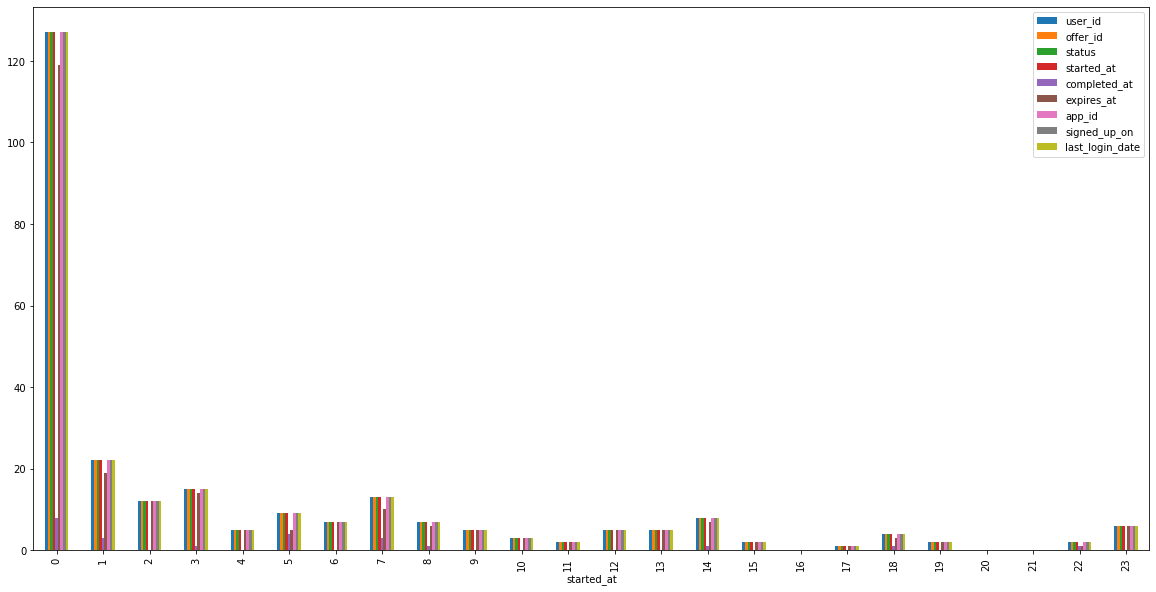

In [40]:
# plot a figure to understand when offers are most initiated
sikka_offer_start = sikka_offer.groupby(sikka_offer['started_at'].dt.hour).count().reindex(np.arange(24), fill_value=0)
sikka_offer_start.plot(kind="bar")
plt.gcf().set_size_inches(20, 10)
plt.show()

* **Offer Completion by Users**

In [106]:
# filter rows where column completed_at has a value and is not null
offer_completed = sikka_offer[sikka_offer.completed_at.notnull()]

In [107]:
offer_completed.shape

(23, 9)

#### There are only 23 offers that have been successfully completed

In [43]:
offer_completed.head()

,user_id,offer_id,status,started_at,completed_at,expires_at,app_id,signed_up_on,last_login_date
8,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3462,COMPLETED,2022-11-26 05:38:27.267609+00:00,2022-11-26 05:49:44.332463+00:00,NaN,sikka,2022-11-26,2022-11-29
14,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3227,COMPLETED,2022-11-28 07:44:27.344271+00:00,2022-11-28 07:47:01.079157+00:00,NaN,sikka,2022-11-26,2022-11-29
20,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3541,COMPLETED,2022-11-28 07:53:58.569308+00:00,2022-11-28 08:00:34.379933+00:00,NaN,sikka,2022-11-26,2022-11-29
22,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3443,COMPLETED,2022-11-28 08:02:55.130103+00:00,2022-11-28 08:06:39.074543+00:00,NaN,sikka,2022-11-26,2022-11-29
26,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2415,COMPLETED,2022-11-29 01:35:43.063338+00:00,2022-11-29 01:40:14.301869+00:00,NaN,sikka,2022-11-26,2022-11-29


In [108]:
# calculate total minutes taken for completion by users by subtracting started_at from completed_at 
offer_completed['minutes_for_completion'] = pd.to_datetime(offer_completed['completed_at']) - pd.to_datetime(offer_completed['started_at'])

<ipython-input-108-2468ca9741df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_completed['minutes_for_completion'] = pd.to_datetime(offer_completed['completed_at']) - pd.to_datetime(offer_completed['started_at'])


In [109]:
# drop rows where the offer is expired and only taking completed offers
offer_completed = offer_completed.drop('expires_at', axis = 1)
offer_completed.head()

,user_id,offer_id,status,started_at,completed_at,app_id,signed_up_on,last_login_date,minutes_for_completion
8,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3462,COMPLETED,2022-11-26 05:38:27.267609+00:00,2022-11-26 05:49:44.332463+00:00,sikka,2022-11-26,2022-11-29,0 days 00:11:17.064854
14,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3227,COMPLETED,2022-11-28 07:44:27.344271+00:00,2022-11-28 07:47:01.079157+00:00,sikka,2022-11-26,2022-11-29,0 days 00:02:33.734886
20,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3541,COMPLETED,2022-11-28 07:53:58.569308+00:00,2022-11-28 08:00:34.379933+00:00,sikka,2022-11-26,2022-11-29,0 days 00:06:35.810625
22,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3443,COMPLETED,2022-11-28 08:02:55.130103+00:00,2022-11-28 08:06:39.074543+00:00,sikka,2022-11-26,2022-11-29,0 days 00:03:43.944440
26,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2415,COMPLETED,2022-11-29 01:35:43.063338+00:00,2022-11-29 01:40:14.301869+00:00,sikka,2022-11-26,2022-11-29,0 days 00:04:31.238531


In [115]:
# sorting the dataframe according to minutes taken to complete the offer
offer_completed.sort_values(by = 'minutes_for_completion')

,user_id,offer_id,status,started_at,completed_at,app_id,signed_up_on,last_login_date,minutes_for_completion
318,0bdf2e4e-c610-4196-b8be-f08e24e97058,3503,COMPLETED,2022-11-26 01:04:35.963800+00:00,2022-11-26 01:05:11.869647+00:00,sikka,2022-11-26,2022-11-26,0 days 00:00:35.905847
324,ae5096d9-fa15-443d-9f30-c9a46abf4359,3463,COMPLETED,2022-11-26 00:42:22.547458+00:00,2022-11-26 00:43:23.495461+00:00,sikka,2022-11-26,2022-11-29,0 days 00:01:00.948003
110,f55000a3-dd68-44d8-b461-41c85d963ce2,2945,COMPLETED,2022-11-26 05:03:11.143774+00:00,2022-11-26 05:04:40.907464+00:00,sikka,2022-11-26,2022-11-27,0 days 00:01:29.763690
87,c303ce63-ce0c-4ca6-a59f-a834e10ea59a,3503,COMPLETED,2022-11-26 05:22:42.954176+00:00,2022-11-26 05:24:29.556187+00:00,sikka,2022-11-26,2022-11-29,0 days 00:01:46.602011
320,dd3eeb44-eb7a-4453-a6ca-c69a32e41bf2,3525,COMPLETED,2022-11-26 00:46:32.007647+00:00,2022-11-26 00:48:42.040829+00:00,sikka,2022-11-26,2022-11-26,0 days 00:02:10.033182
55,aff26172-41d6-4e69-9b02-48011fe35804,3503,COMPLETED,2022-11-28 18:09:06.297070+00:00,2022-11-28 18:11:36.605729+00:00,sikka,2022-11-26,2022-11-29,0 days 00:02:30.308659
14,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3227,COMPLETED,2022-11-28 07:44:27.344271+00:00,2022-11-28 07:47:01.079157+00:00,sikka,2022-11-26,2022-11-29,0 days 00:02:33.734886
130,4cb29e43-9f23-42fe-bab8-2422f42e7a91,3520,COMPLETED,2022-11-29 00:39:29.119030+00:00,2022-11-29 00:42:37.557293+00:00,sikka,2022-11-26,2022-11-29,0 days 00:03:08.438263
22,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3443,COMPLETED,2022-11-28 08:02:55.130103+00:00,2022-11-28 08:06:39.074543+00:00,sikka,2022-11-26,2022-11-29,0 days 00:03:43.944440
124,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2415,COMPLETED,2022-11-28 01:22:43.818904+00:00,2022-11-28 01:26:58.333522+00:00,sikka,2022-11-26,2022-11-29,0 days 00:04:14.514618


In [131]:
# save the above dataframe to a csv 
offer_completed.to_csv('offer_completion.csv')
offer_completed.to_csv(r'C:\Users\Shreemann\Downloads\offer_completion.csv')

In [47]:
# summary for minutes taken for completion 
offer_completed['minutes_for_completion'].describe()

count                           23
mean     0 days 03:11:43.813695869
std      0 days 09:45:54.582275095
min         0 days 00:00:35.905847
25%      0 days 00:02:32.021772500
50%         0 days 00:06:35.810625
75%         0 days 00:25:43.944140
max         1 days 19:19:09.376737
Name: minutes_for_completion, dtype: object

### Inference: 
* The longest time taken by the user to complete the offer is 1 day and 19 hours. 
* The shortest time taken by the user to complete the offer is 35 seconds. 
* Mean time taken for a user to complete the offer is 3 hours and 11 minutes. 

In [133]:
offer_completed['minutes'] = offer_completed['minutes_for_completion'].dt.total_seconds()/60
#offer_completed['minutes_for_completion'].dt.hour.count().reindex(np.arange(24), fill_value=0)

In [134]:
offer_completed['minutes']

8        11.284414
14        2.562248
20        6.596844
22        3.732407
26        4.520642
44      366.610765
45       35.133805
53     1225.829216
55        2.505144
87        1.776700
110       1.496062
122      10.575402
124       4.241910
130       3.140638
133      12.275993
135      23.522598
250      24.779921
292      26.684884
297    2599.156279
307      39.587928
318       0.598431
320       2.167220
324       1.015800
Name: minutes, dtype: float64

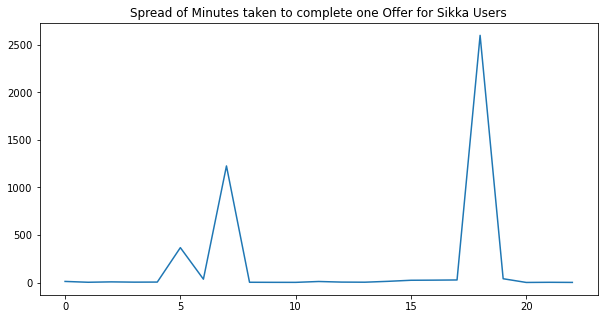

In [156]:
plt.plot(range(0,23),offer_completed['minutes'], linestyle ='solid')
plt.title('Spread of Minutes taken to complete one Offer for Sikka Users')
plt.show()

* **Rewards Earned by Users**

In [159]:
# using the merged dataframe of rewards, filter rows with only users from Sikka app
sikka_rewards = rewards.loc[rewards['app_id'] == 'sikka']
sikka_rewards.head()

,reward_id,user_id,date,app_id,Unnamed: 0,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,2678,3520,Complete Registration,500,1758
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,441,792,Complete Registration,200,0
2,935,c925ccad-98e7-4500-833e-a49aa066aeec,2022-11-26,sikka,441,792,Complete Registration,200,0
3,935,3db62aad-421b-474e-9b1e-8a88ff370d4f,2022-11-26,sikka,441,792,Complete Registration,200,0
5,935,2c93173e-b325-47d9-bac5-6e21641f97bc,2022-11-28,sikka,441,792,Complete Registration,200,0


#### Group by User ID, Reward ID, Offer ID and Labels of Rewards to find the total payout for users in paise

In [99]:
rewards_earned = sikka_rewards.groupby(['user_id', 'reward_id','offer_id','label_in_english'])['total_payout_in_paise'].sum().reset_index().sort_values(by = 'total_payout_in_paise', ascending = False)
rewards_earned

,user_id,reward_id,offer_id,label_in_english,total_payout_in_paise
21,738049d5-018a-41e7-b2a1-8604fe07cad2,3362,3173,Complete Registration,9000
15,4cb29e43-9f23-42fe-bab8-2422f42e7a91,3657,3467,Complete Registration,1200
10,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3652,3462,Complete Registration,1200
19,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,3702,3510,Register,600
1,0bdf2e4e-c610-4196-b8be-f08e24e97058,3702,3510,Register,600
16,4cb29e43-9f23-42fe-bab8-2422f42e7a91,3712,3520,Complete Registration,500
12,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3735,3541,Complete Registration,500
17,4cb29e43-9f23-42fe-bab8-2422f42e7a91,3735,3541,Complete Registration,500
14,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2613,2415,Complete Registration,400
0,033c38d4-fd46-45a2-b09a-18d637c54129,3697,3505,Register,400


#### Group by only User ID, Reward ID to check if a user claims more than one reward

In [97]:
rewards_earned = sikka_rewards.groupby(['user_id', 'reward_id'])['total_payout_in_paise'].sum().sort_values(ascending = False)
rewards_earned

user_id                               reward_id
738049d5-018a-41e7-b2a1-8604fe07cad2  3362         9000
4cb29e43-9f23-42fe-bab8-2422f42e7a91  3657         1200
44f9c9f1-1ce1-4b04-8042-ddb1c548c589  3652         1200
55e70808-0ed9-44fd-9d87-819ba9dc4d3e  3702          600
0bdf2e4e-c610-4196-b8be-f08e24e97058  3702          600
4cb29e43-9f23-42fe-bab8-2422f42e7a91  3712          500
44f9c9f1-1ce1-4b04-8042-ddb1c548c589  3735          500
4cb29e43-9f23-42fe-bab8-2422f42e7a91  3735          500
                                      2613          400
033c38d4-fd46-45a2-b09a-18d637c54129  3697          400
44f9c9f1-1ce1-4b04-8042-ddb1c548c589  2613          400
aff26172-41d6-4e69-9b02-48011fe35804  3697          400
55e70808-0ed9-44fd-9d87-819ba9dc4d3e  3720          250
44f9c9f1-1ce1-4b04-8042-ddb1c548c589  3416          250
55e70808-0ed9-44fd-9d87-819ba9dc4d3e  935           200
ae5096d9-fa15-443d-9f30-c9a46abf4359  3653          200
c925ccad-98e7-4500-833e-a49aa066aeec  935           200


* **Revenue Generated**

In [160]:
revenue_generated = sikka_rewards.groupby(['user_id', 'reward_id','offer_id','label_in_english'])['total_revenue_in_paise'].sum().reset_index().sort_values(by = 'total_revenue_in_paise', ascending = False)
revenue_generated

,user_id,reward_id,offer_id,label_in_english,total_revenue_in_paise
21,738049d5-018a-41e7-b2a1-8604fe07cad2,3362,3173,Complete Registration,20000
15,4cb29e43-9f23-42fe-bab8-2422f42e7a91,3657,3467,Complete Registration,2200
10,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3652,3462,Complete Registration,2200
19,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,3702,3510,Register,2000
1,0bdf2e4e-c610-4196-b8be-f08e24e97058,3702,3510,Register,2000
16,4cb29e43-9f23-42fe-bab8-2422f42e7a91,3712,3520,Complete Registration,1758
17,4cb29e43-9f23-42fe-bab8-2422f42e7a91,3735,3541,Complete Registration,1500
12,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3735,3541,Complete Registration,1500
8,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,3416,3227,Download,823
0,033c38d4-fd46-45a2-b09a-18d637c54129,3697,3505,Register,800


In [161]:
revenue_generated['total_revenue_in_paise'].sum()

39687

## For Sikka Pro

* **Offer Initiated by Users**

In [143]:
# filter data with only Sikka pro app data
pro_offer = users_with_app.loc[users_with_app['app_id'] == 'sikka_pro']

In [110]:
pro_offer.head()

,user_id,offer_id,status,started_at,completed_at,expires_at,app_id,signed_up_on,last_login_date
59,53134b4c-9bbf-4296-bea4-62587663f030,3015,ONGOING,2022-11-26 10:02:03.861407+00:00,NaN,2022-11-28 10:02:03.867601+00:00,sikka_pro,2022-11-26,2022-11-29
60,53134b4c-9bbf-4296-bea4-62587663f030,3321,ONGOING,2022-11-26 02:08:04.552549+00:00,NaN,2022-11-28 02:08:04.558522+00:00,sikka_pro,2022-11-26,2022-11-29
61,53134b4c-9bbf-4296-bea4-62587663f030,2945,ONGOING,2022-11-26 02:10:39.163594+00:00,NaN,2022-11-28 02:10:39.172904+00:00,sikka_pro,2022-11-26,2022-11-29
62,53134b4c-9bbf-4296-bea4-62587663f030,3173,ONGOING,2022-11-26 05:02:36.023014+00:00,NaN,2022-11-28 05:02:36.027180+00:00,sikka_pro,2022-11-26,2022-11-29
63,53134b4c-9bbf-4296-bea4-62587663f030,3503,COMPLETED,2022-11-26 02:11:44.301954+00:00,2022-11-26 02:12:45.783440+00:00,NaN,sikka_pro,2022-11-26,2022-11-29


In [111]:
pro_offer['app_id'].value_counts()

sikka_pro    237
Name: app_id, dtype: int64

In [113]:
# check for any null values
pro_offer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 59 to 487
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          237 non-null    object
 1   offer_id         237 non-null    int64 
 2   status           237 non-null    object
 3   started_at       237 non-null    object
 4   completed_at     40 non-null     object
 5   expires_at       197 non-null    object
 6   app_id           237 non-null    object
 7   signed_up_on     237 non-null    object
 8   last_login_date  237 non-null    object
dtypes: int64(1), object(8)
memory usage: 18.5+ KB


**There have been only 40 instances when offer is completed by the users of Sikka Pro**

In [144]:
# convert to datetime for easier calculation
pro_offer['started_at'] = pd.to_datetime(pro_offer['started_at'])

<ipython-input-144-6610dd519db1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_offer['started_at'] = pd.to_datetime(pro_offer['started_at'])


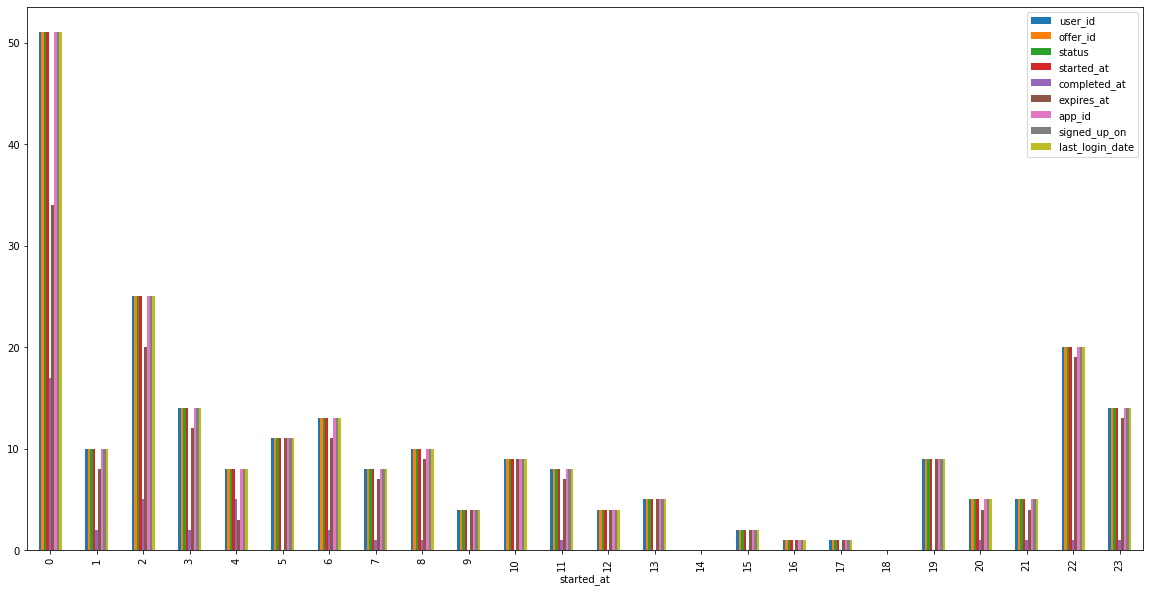

In [115]:
# plot a figure to understand when offers are most initiated
pro_plot = pro_offer.groupby(pro_offer['started_at'].dt.hour).count().reindex(np.arange(24), fill_value=0)
pro_plot.plot(kind="bar")
plt.gcf().set_size_inches(20, 10)
plt.show()

* **Offer Completion by Users**

In [145]:
offer_completed2 = pro_offer[pro_offer.completed_at.notnull()]

In [119]:
offer_completed2.head()

,user_id,offer_id,status,started_at,completed_at,expires_at,app_id,signed_up_on,last_login_date
63,53134b4c-9bbf-4296-bea4-62587663f030,3503,COMPLETED,2022-11-26 02:11:44.301954+00:00,2022-11-26 02:12:45.783440+00:00,NaN,sikka_pro,2022-11-26,2022-11-29
139,4960fecc-a53a-4d08-99e6-5ef807d9f270,2415,COMPLETED,2022-11-26 00:16:28.007987+00:00,2022-11-26 00:20:41.045066+00:00,NaN,sikka_pro,2022-11-26,2022-11-29
142,4960fecc-a53a-4d08-99e6-5ef807d9f270,3529,COMPLETED,2022-11-26 00:24:12.803939+00:00,2022-11-28 01:03:03.722132+00:00,NaN,sikka_pro,2022-11-26,2022-11-29
144,4960fecc-a53a-4d08-99e6-5ef807d9f270,3463,COMPLETED,2022-11-26 00:41:12.501542+00:00,2022-11-26 00:42:13.326992+00:00,NaN,sikka_pro,2022-11-26,2022-11-29
152,4960fecc-a53a-4d08-99e6-5ef807d9f270,3541,COMPLETED,2022-11-28 11:35:15.675157+00:00,2022-11-28 11:45:11.676273+00:00,NaN,sikka_pro,2022-11-26,2022-11-29


In [146]:
offer_completed2['minutes_for_completion'] = pd.to_datetime(offer_completed2['completed_at']) - pd.to_datetime(offer_completed2['started_at'])

<ipython-input-146-5669457e1fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_completed2['minutes_for_completion'] = pd.to_datetime(offer_completed2['completed_at']) - pd.to_datetime(offer_completed2['started_at'])


In [147]:
offer_completed2 = offer_completed2.drop('expires_at', axis = 1)
offer_completed2.head()

,user_id,offer_id,status,started_at,completed_at,app_id,signed_up_on,last_login_date,minutes_for_completion
63,53134b4c-9bbf-4296-bea4-62587663f030,3503,COMPLETED,2022-11-26 02:11:44.301954+00:00,2022-11-26 02:12:45.783440+00:00,sikka_pro,2022-11-26,2022-11-29,0 days 00:01:01.481486
139,4960fecc-a53a-4d08-99e6-5ef807d9f270,2415,COMPLETED,2022-11-26 00:16:28.007987+00:00,2022-11-26 00:20:41.045066+00:00,sikka_pro,2022-11-26,2022-11-29,0 days 00:04:13.037079
142,4960fecc-a53a-4d08-99e6-5ef807d9f270,3529,COMPLETED,2022-11-26 00:24:12.803939+00:00,2022-11-28 01:03:03.722132+00:00,sikka_pro,2022-11-26,2022-11-29,2 days 00:38:50.918193
144,4960fecc-a53a-4d08-99e6-5ef807d9f270,3463,COMPLETED,2022-11-26 00:41:12.501542+00:00,2022-11-26 00:42:13.326992+00:00,sikka_pro,2022-11-26,2022-11-29,0 days 00:01:00.825450
152,4960fecc-a53a-4d08-99e6-5ef807d9f270,3541,COMPLETED,2022-11-28 11:35:15.675157+00:00,2022-11-28 11:45:11.676273+00:00,sikka_pro,2022-11-26,2022-11-29,0 days 00:09:56.001116


In [122]:
offer_completed2['minutes_for_completion'].describe()

count                           40
mean     0 days 01:37:56.362646875
std      0 days 07:45:34.847974369
min         0 days 00:00:46.544774
25%      0 days 00:01:36.375694500
50%         0 days 00:04:33.509003
75%         0 days 00:08:12.774401
max         2 days 00:38:50.918193
Name: minutes_for_completion, dtype: object

### Inference: 
* The longest time taken by the user to complete the offer is 2 day and 38 minutes. 
* The shortest time taken by the user to complete the offer is 46 seconds. 
* Mean time taken for a user to complete the offer is 1 hours and 37 minutes. 

In [148]:
offer_completed2['minutes'] = offer_completed2['minutes_for_completion'].dt.total_seconds()/60
offer_completed2['minutes']

63        1.024691
139       4.217285
142    2918.848637
144       1.013758
152       9.933352
175      19.356830
191       6.313482
194       5.269239
195       1.005056
196     275.821478
204       2.577854
206       2.224379
211       5.150265
266       0.775746
268      26.751313
269       4.620164
270       2.285839
271       0.883456
272       0.995930
277       1.085464
350      12.752339
354     487.688329
365       6.069445
371       1.903674
380       7.639425
382       5.083270
383       4.496803
386       5.901175
410       2.590939
415       5.138227
423      12.996563
431       0.975991
432       3.841421
435       1.232603
447       1.705517
448       1.308496
450       1.907824
460       4.649061
473      18.948989
482      40.590791
Name: minutes, dtype: float64

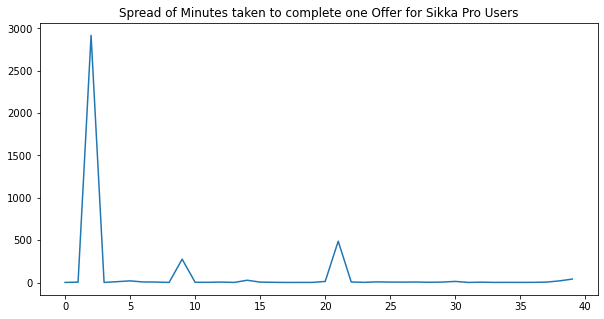

In [155]:
plt.plot(range(0,40),offer_completed2['minutes'],linestyle ='solid')
plt.title('Spread of Minutes taken to complete one Offer for Sikka Pro Users')
plt.show()

* **Rewards Earned by Users**

In [162]:
# using the merged dataframe for rewards, locate only those observations where app is sikka pro
pro_rewards = rewards.loc[rewards['app_id'] == 'sikka_pro']
pro_rewards.head()

,reward_id,user_id,date,app_id,Unnamed: 0,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
4,935,805763d6-87b3-40c7-bb84-dd663669c836,2022-11-27,sikka_pro,441,792,Complete Registration,200,0
9,3416,39b085c1-1e08-4d4e-ae85-04c40647c989,2022-11-26,sikka_pro,2404,3227,Download,250,823
11,3720,d0213a98-fcb0-4b1d-b795-ed89ddc61f9a,2022-11-27,sikka_pro,2687,3528,Complete Registration.,250,700
14,3735,5baab7e2-f5ad-4f9d-b749-9d8e9bee9d2d,2022-11-28,sikka_pro,2701,3541,Complete Registration,500,1500
15,3735,4960fecc-a53a-4d08-99e6-5ef807d9f270,2022-11-28,sikka_pro,2701,3541,Complete Registration,500,1500


In [125]:
# find highest rewards earned by users using sikka pro
rewards_earned2 = pro_rewards.groupby(['user_id', 'reward_id','offer_id','label_in_english'])['total_payout_in_paise'].sum().reset_index().sort_values(by = 'total_payout_in_paise', ascending = False)
rewards_earned2

,user_id,reward_id,offer_id,label_in_english,total_payout_in_paise
28,6b4c4353-05e7-4bd3-9a3c-de0d1a19c700,3709,3517,Register,2500
8,39b085c1-1e08-4d4e-ae85-04c40647c989,3709,3517,Register,2500
14,417bcb37-44cf-43c3-ba51-5d39c825caf7,3709,3517,Register,2500
40,e066a509-b551-43bf-87a3-7416ecb7ce73,3657,3467,Complete Registration,1200
26,67d4464d-62b8-4d5e-85f2-4144a732b154,3657,3467,Complete Registration,1200
33,805763d6-87b3-40c7-bb84-dd663669c836,3572,3382,Register,800
0,0e205d6d-d50b-4dba-a0cd-0355b4f2cc49,3569,3379,Complete Registration,600
11,417bcb37-44cf-43c3-ba51-5d39c825caf7,3702,3510,Register,600
7,39b085c1-1e08-4d4e-ae85-04c40647c989,3702,3510,Register,600
25,5baab7e2-f5ad-4f9d-b749-9d8e9bee9d2d,3735,3541,Complete Registration,500


In [126]:
rewards_earned2 = pro_rewards.groupby(['user_id', 'reward_id'])['total_payout_in_paise'].sum().sort_values(ascending = False)
rewards_earned2

user_id                               reward_id
6b4c4353-05e7-4bd3-9a3c-de0d1a19c700  3709         2500
39b085c1-1e08-4d4e-ae85-04c40647c989  3709         2500
417bcb37-44cf-43c3-ba51-5d39c825caf7  3709         2500
e066a509-b551-43bf-87a3-7416ecb7ce73  3657         1200
67d4464d-62b8-4d5e-85f2-4144a732b154  3657         1200
805763d6-87b3-40c7-bb84-dd663669c836  3572          800
0e205d6d-d50b-4dba-a0cd-0355b4f2cc49  3569          600
417bcb37-44cf-43c3-ba51-5d39c825caf7  3702          600
39b085c1-1e08-4d4e-ae85-04c40647c989  3702          600
5baab7e2-f5ad-4f9d-b749-9d8e9bee9d2d  3735          500
417bcb37-44cf-43c3-ba51-5d39c825caf7  3705          500
4960fecc-a53a-4d08-99e6-5ef807d9f270  3735          500
417bcb37-44cf-43c3-ba51-5d39c825caf7  3621          500
6b4c4353-05e7-4bd3-9a3c-de0d1a19c700  2613          400
4960fecc-a53a-4d08-99e6-5ef807d9f270  2613          400
f5a888fe-f92d-44ed-899f-ef0a8ee7e0f2  3247          400
39b085c1-1e08-4d4e-ae85-04c40647c989  3667          300


* **Revenue Generated**

In [163]:
revenue_generated2 = pro_rewards.groupby(['user_id', 'reward_id','offer_id','label_in_english'])['total_revenue_in_paise'].sum().reset_index().sort_values(by = 'total_revenue_in_paise', ascending = False)
revenue_generated2

,user_id,reward_id,offer_id,label_in_english,total_revenue_in_paise
0,0e205d6d-d50b-4dba-a0cd-0355b4f2cc49,3569,3379,Complete Registration,5600
33,805763d6-87b3-40c7-bb84-dd663669c836,3572,3382,Register,4000
13,417bcb37-44cf-43c3-ba51-5d39c825caf7,3705,3513,Register,2500
40,e066a509-b551-43bf-87a3-7416ecb7ce73,3657,3467,Complete Registration,2200
26,67d4464d-62b8-4d5e-85f2-4144a732b154,3657,3467,Complete Registration,2200
7,39b085c1-1e08-4d4e-ae85-04c40647c989,3702,3510,Register,2000
11,417bcb37-44cf-43c3-ba51-5d39c825caf7,3702,3510,Register,2000
10,417bcb37-44cf-43c3-ba51-5d39c825caf7,3621,3431,Complete Registration,1500
25,5baab7e2-f5ad-4f9d-b749-9d8e9bee9d2d,3735,3541,Complete Registration,1500
21,4960fecc-a53a-4d08-99e6-5ef807d9f270,3735,3541,Complete Registration,1500


In [164]:
revenue_generated2['total_revenue_in_paise'].sum()

40457